In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import gensim
import spacy

## **Plan of Action**

- Load the data
- Drop unnecessary columns and rows
- Removal of stop words.
- Feature engineering;
    - Doc2Vec
- Begin modelling
    - Algorithms to use;
        - k-Nearest Neighbors.
        - Decision Trees.
        - Random Forest.
        - Gradient Boosting.
        - Logistic Regression
- Evaluation;
    - F1-score_macro
    - AUC
    - ROC

In [2]:
df_clean = pd.read_csv('../../../../cleaned_reviews.csv')

In [3]:
df_clean.shape

(17340, 4)

In [4]:
df_clean.columns

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [5]:
df_clean.drop(columns=['cleaned_review_length','review_score'],inplace=True)

Checking for Null Vaules and Duplicates

In [6]:
df_clean.isna().sum()

sentiments        0
cleaned_review    3
dtype: int64

In [7]:
df_clean.dropna(inplace=True)

In [8]:
df_clean.shape

(17337, 2)

In [9]:
# Removing several stop words
all_stopwords = {"'d","'ll","'m","'re","'s","'ve",'a','about',
'above','across','after','afterwards','again','all','almost','alone','along',
'already','also','although','always','am','among','amongst','amount','an','and',
'another','any','anyhow','anyone','anything','anyway','anywhere','are','around',
'as','at','back','be','became','because','become','becomes','becoming','been','before',
'beforehand','behind','being','below','beside','besides','between','both','bottom',
'but','by','ca','call','can','could','did','do','does','doing','done','down','due','during','each',
'eight','either','eleven','else','elsewhere','empty','even','everyone','everything',
'everywhere','except','few','fifteen','fifty','first','five','for','former','formerly','forty','four','from','front',
'full','further','go','had','has','have','he','hence','her','here','hereafter','hereby','herein','hereupon','hers',
'herself','him','himself','his','how','however','hundred','i','if','in','indeed','into','is','it','its','itself','just','keep','last',
'latter','latterly','made','make','many','may','me','meanwhile','might','mine','more','moreover','move','much',
'must','my','myself','name','namely','neither','nevertheless','next','nine','nobody','noone','nothing','now','nowhere','of','often',
'on','once','one','only','onto','or','other','others','otherwise','our','ours','ourselves','out','own','part','per','perhaps','please','put',
'rather','re','regarding','same','say','see','several','she','should','show','side',
'since','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such','take','ten','than','that','the','their',
'them','themselves','then','thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','third','this','those','though','three',
'through','throughout','thru','thus','to','together','top','toward','towards','twelve','twenty','two','under','unless','until','up','upon','us','used','using',
'various','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon',
'wherever','whether','which','while','whither','who','whoever','whole','whom','whose','why','will','with','within','would','yet','you','your','yours','yourself',
'yourselves','‘d','‘ll','‘m','‘re','‘s','‘ve','’d','’ll','’m','’re','’s','’ve'}
my_stop_words = set(all_stopwords) # My own stop words

In [10]:
print(my_stop_words)

{'’ll', 'itself', 'who', 'yet', 'will', 'under', 'hundred', 'thus', 'thereby', 'used', 'there', 'himself', 'did', 'twenty', 'above', '‘ll', 'anyway', 'then', 'just', 'for', 'noone', 'show', 'together', 'next', 'whereas', 'third', 'top', 'unless', 'this', 'thereupon', 'from', 'perhaps', 'herself', '’d', '’re', '‘m', 'that', 'last', 'amongst', 'beforehand', 'somehow', 'therein', 'her', 'nevertheless', 'to', '‘re', 'than', 'them', 'rather', 'alone', 'almost', 'any', 'various', 'still', "'ve", '‘s', 'before', "'d", 'hereafter', 'hers', 'besides', 'have', 're', 'ten', 'see', 'though', 'everything', 'within', 'as', 'due', 'few', 'somewhere', 'toward', 'please', 'indeed', 'of', 'yourselves', 'others', 'been', 'everyone', 'both', 'meanwhile', 'are', "'ll", 'whereupon', 'same', "'m", 'whole', 'front', "'s", 'although', 'formerly', 'nowhere', 'forty', 'only', 'me', 'how', 'onto', 'fifty', 'nobody', 'ca', 'your', 'becomes', 'become', 'further', 'whereafter', 'namely', 'whose', 'my', 'is', 'where'

In [11]:
df_clean

,sentiments,cleaned_review
0,positive,i wish would have gotten one earlier love it a...
1,neutral,i ve learned this lesson again open the packag...
2,neutral,it is so slow and lags find better option
3,neutral,roller ball stopped working within months of m...
4,neutral,i like the color and size but it few days out ...
...,...,...
17335,positive,i love this speaker and love can take it anywh...
17336,positive,i use it in my house easy to connect and loud ...
17337,positive,the bass is good and the battery is amazing mu...
17338,positive,love it


In [12]:
nlp = spacy.load("en_core_web_sm")

In [13]:
def spacy_tokeniser(sent):
    sent = sent.strip().lower()
    doc = nlp(sent)
    mytokens = [token.lemma_ for token in doc if token.text not in my_stop_words]
    return mytokens

In [14]:
df_clean['tokens']= df_clean['cleaned_review'].apply(spacy_tokeniser)

In [15]:
df_clean.head()

,sentiments,cleaned_review,tokens
0,positive,i wish would have gotten one earlier love it a...,"[wish, get, early, love, make, work, laptop, e..."
1,neutral,i ve learned this lesson again open the packag...,"[ve, learn, lesson, open, package, use, produc..."
2,neutral,it is so slow and lags find better option,"[slow, lag, find, well, option]"
3,neutral,roller ball stopped working within months of m...,"[roller, ball, stop, work, month, minimal, use..."
4,neutral,i like the color and size but it few days out ...,"[like, color, size, day, return, period, not, ..."


In [16]:
# Dropping unnecessary columns
df_clean.drop(columns=['cleaned_review'],inplace=True)

Sentiment Mapping

In [17]:
sentiment_mapping = {'negative':-1,'neutral':0,'positive':1}
df_clean['sentiment_label'] = df_clean.sentiments.map(sentiment_mapping)

In [18]:
df_clean.drop(columns=['sentiments'],inplace=True)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score

# The algorithms
import xgboost as xgb

In [20]:
df_clean

,tokens,sentiment_label
0,"[wish, get, early, love, make, work, laptop, e...",1
1,"[ve, learn, lesson, open, package, use, produc...",0
2,"[slow, lag, find, well, option]",0
3,"[roller, ball, stop, work, month, minimal, use...",0
4,"[like, color, size, day, return, period, not, ...",0
...,...,...
17335,"[love, speaker, love, charge, phone, work, no,...",1
17336,"[use, house, easy, connect, loud, clear, music]",1
17337,"[bass, good, battery, amazing, well, charge, t...",1
17338,[love],1


In [21]:
from sklearn.model_selection import GridSearchCV
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [22]:
train, test = train_test_split(df_clean,test_size=.2,random_state=42, 
                                            stratify=df_clean.sentiment_label)

In [23]:
# Tagging the train ad test set

# Tag train set 
tagged_train = train.apply(
    lambda x: TaggedDocument(words=x["tokens"],tags=[x.sentiment_label]),
    axis=1
)

# Tag test set 
tagged_test = test.apply(
    lambda x: TaggedDocument(words=x["tokens"],tags=[x.sentiment_label]),
    axis=1
)

In [24]:
# looking into the tags
tagged_train.values[0]

TaggedDocument(words=['pair', 'headphone', 'work', 'really', 'plan', 'buy', 'pair', 'current', 'pair', 'gotten', 'damage', 'put', 'pair', 'uneven', 'surface', 'wire', 'tug', 'too', 'knock', 'head', 'phone', 'accident', 'time', 'walk', 'wear', 'head', 'phone', 'drop', 'phone', 'cord', 'got', 'accidentally', 'tug', 'unplugged', 'phone', 'won', 'headphone', 'outside', 'room', 'anymore', 'room', 'enough', 'organize', 'shouldn', 'end', 'knock', 'over', 'accident', 'anymore'], tags=[-1])

In [25]:
tagged_test.values[0]

TaggedDocument(words=['break', 'right', 'run', 'return', 'window', 'came', 'narrow', 'move', 'link', 'event', 'not', 'don', 'know', 'problem'], tags=[-1])

### **Setting up DOC2VEC**

In [26]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores # Mine is 8 cores
four_cores = cores-4
four_cores

4

### **Building the Vocabulary**

In [27]:
# dm=0, it signifies PV-DBOW
model_dbow= Doc2Vec(
    dm=0,
    vector_size=200,
    min_count=2,
    sample=0,
    workers=four_cores,
    hs=0,
    seed= 42,
    negative=5
)

In [28]:
model_dbow.build_vocab(tagged_train)

In [29]:
# Word Apperance Count
def word_count(word:str):
    print(f"Word {word} appeared {model_dbow.wv.get_vecattr(word, 'count')} times in the training corpus.")


word_count("terrible")

Word terrible appeared 130 times in the training corpus.


In [30]:
# Next, train the model on the corpus.
model_dbow.train(
                tagged_train,
                total_examples=model_dbow.corpus_count,
                epochs=100,
)

In [31]:
# checking the alpha value
model_dbow.alpha

0.025

In [57]:
# Saving the model
import pickle
pickle.dump(model_dbow,open("pv_dbow_200_model.pkl","wb"))

In [33]:
# https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/ipynb_with_output/Document%20classification%20with%20word%20embeddings%20tutorial%20-%20with%20output.ipynb
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    y, X = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=100)) for doc in sents])
    return X,y

In [34]:
X_train, y_train = vec_for_learning(model_dbow, tagged_train)
X_test, y_test = vec_for_learning(model_dbow, tagged_test)

In [35]:
# Default parameters
models = {
    "XGB": xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    seed=42)
}

In [36]:
# https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
# The abov link explains why f1_macro was used
model_results_f1_macro = []
model_names = []
model_mean = []

In [37]:
my_cv = StratifiedShuffleSplit(n_splits=5,test_size=.1,random_state=42) # 10% for validation 
scoring = 'f1_macro'
for name, model in models.items():
    model_names.append(name) # append each name of the model
    print(model) # print the model name for checks
    cv_results = cross_val_score(model,X_train,y_train,scoring=scoring,cv=my_cv,n_jobs=-2) 
    cv_results_list = cv_results.tolist() # Turning the array to a list
    model_results_f1_macro.append(cv_results_list) # append validation results
    model_mean.append(cv_results.mean()) # append the mean

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', predictor=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, seed=42, subsample=None, tree_method=None,
              validate_parameters=None, ...)


In [38]:
print(model_results_f1_macro)
print(model_names)
print(model_mean)

[[0.7731559447460681, 0.7520620365620855, 0.7605110642781877, 0.7946216562290301, 0.7767623006865844]]
['XGB']
[0.7714226005003911]


In [39]:
# Creating a Dictionary of results
f1score_result_dict = dict(zip(model_names,model_results_f1_macro))
f1score_mean_dict = dict(zip(model_names,model_mean))

In [40]:
# Creating a Dataframe of results
f1score_result_frame = pd.DataFrame(f1score_result_dict)
f1score_mean_frame = pd.Series(f1score_mean_dict).to_frame('mean_f1_score').reset_index()
f1score_mean_frame.rename(columns={'index':'models'},inplace=True)

In [41]:
f1score_result_frame

,XGB
0,0.773156
1,0.752062
2,0.760511
3,0.794622
4,0.776762


In [42]:
f1score_mean_frame.sort_values(by='mean_f1_score',ascending=False)

,models,mean_f1_score
0,XGB,0.771423


In [43]:
pipe = Pipeline([('clf',xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    seed=42))])

In [44]:
paramter_grid = {
                'clf__learning_rate':[0.3,0.5,0.7],
                # 'clf__n_estimators':[10,100,200,300],
                # 'clf__subsample':[0.5,0.8,1],
                # 'clf__max_depth':[3,5,6],
                "clf__objective":['multi:softmax'],
                'clf__gamma':[0,1], # the more conservative the algorithm will be
                # 'clf__min_child_weight':[1,2,3], # the more conservative the algorithm will be
                }
my_cv = StratifiedShuffleSplit(n_splits=5,test_size=.1,random_state=42)

In [45]:
mygrid = GridSearchCV(pipe,param_grid=paramter_grid,cv=my_cv,scoring='f1_macro')
mygrid.fit(X_train,y_train)

[12:37:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:40:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:28] WARNI

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=Pipeline(steps=[('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rat...
                                                      n_estimators=100,
        

In [46]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'clf__gamma': 0, 'clf__learning_rate': 0.5, 'clf__objective': 'multi:softmax'}

Best estimator: Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, nthread=4, num_class=3,
                               num_parallel_tree=1, objective='multi:softprob',
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=None, seed=42

In [47]:
mygrid_trainset = mygrid.best_estimator_
mygrid_trainset

# clf  = xgb.XGBClassifier(
#                     objective='multi:softmax',
#                     num_class=3,
#                     nthread=4,
#                     gamma=0,
#                     learning_rate= 0.5,
#                     seed=42)
# Best validation score: 0.7881526000836419

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, nthread=4, num_class=3,
                               num_parallel_tree=1, objective='multi:softprob',
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, scale_pos_weight=None, seed=42,
                               subsample=1, tree_method='exact', ...))])

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1227
           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      7602

    accuracy                           1.00     13869
   macro avg       1.00      1.00      1.00     13869
weighted avg       1.00      1.00      1.00     13869



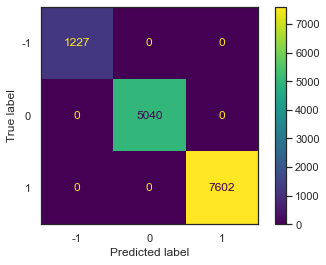

In [48]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred_train = mygrid_trainset.predict(X_train)



y_train = y_train
sns.set_theme(style='white')
def class_report(model,y_train,y_pred_train):
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_train,y_pred_train,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(mygrid_trainset,y_train,y_pred_train)

**ROC on training data**

In [49]:
# Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)

[13:23:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


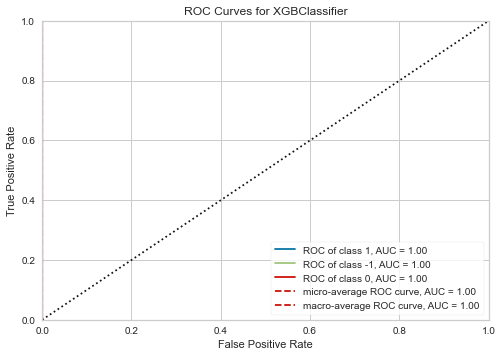

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=[-1,0,1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the training data
visualizer.show() 

**Building the model with best estimator and testing on test data**

In [51]:
# Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)
clf.fit(X_train,y_train)

[13:25:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=42, subsample=1, tree_method='exact', ...)

              precision    recall  f1-score   support

          -1       0.80      0.48      0.60       307
           0       0.77      0.81      0.79      1260
           1       0.87      0.90      0.88      1901

    accuracy                           0.83      3468
   macro avg       0.82      0.73      0.76      3468
weighted avg       0.83      0.83      0.82      3468



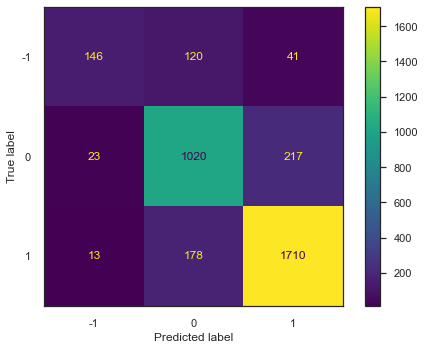

In [52]:
# Classification report test data
y_test = y_test
y_pred_test = clf.predict(X_test)
sns.set_theme(style='white')
def class_report(model,y_test,pred):
    print(classification_report(y_test,pred))
    cm = confusion_matrix(y_test,pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


class_report(clf,y_test,y_pred_test)

**ROC on test data**

In [53]:
# Without PCA
clf  = xgb.XGBClassifier(
                    objective='multi:softmax',
                    num_class=3,
                    nthread=4,
                    gamma=0,
                    learning_rate= 0.5,
                    seed=42)

[13:27:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


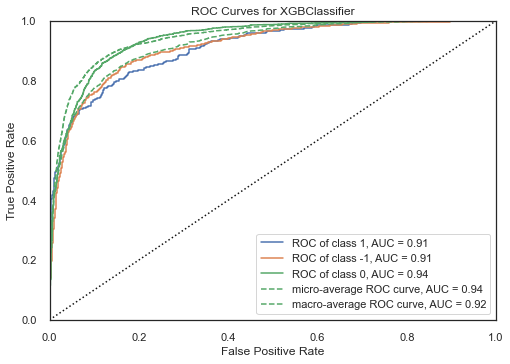

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
# Without PCA
visualizer = ROCAUC(clf, classes=[-1,0,1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## **Conclusion**

**Table of Values**

dataset|f1_score_macro_avg|AUC_score_avg
| ----------- | ----------- | ----------- |
df_clean_(train data)|1.00|1.00
df_clean (test data)|0.76|0.92

In [55]:
import pickle 
clf.fit(X_train, y_train)
pickle.dump(clf,open("doc2vec_xgb_200.pkl",'wb'))

[13:29:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
